##IMPORTACIÓN DE BIBLIOTECAS E INFORMACIÓN DE SUS VERSIONES.

In [ ]:
#Para Manipulación de datos
import pandas as pd
import numpy as np
#Para Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
#Para Manejo de JSON anidado
import json

# Configuraciones opcionales para visualización
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

# Comprobación de versiones (opcional)
print(f"Pandas: {pd.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Seaborn: {sns.__version__}")
#print(f"Matplotlib: {plt.__version__}")
print(matplotlib.__version__)

Pandas: 2.2.2
Numpy: 2.0.2
Seaborn: 0.13.2
3.10.0


##PREPARACIÓN DE LOS DATOS

###Subir los datos y convertirlos en el dataframe "data"

In [ ]:
pd.read_csv('/content/datos_normalizados.csv')

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
data = pd.read_csv('/content/datos_normalizados.csv')

###Extraer las características del dataframe "data"

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(7267, 21)

In [ ]:
data.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
data['customerID']

,customerID
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7262,9987-LUTYD
7263,9992-RRAMN
7264,9992-UJOEL
7265,9993-LHIEB


###Eliminación de Columnas Irrelevantes

In [ ]:
#Elimina columnas que no aportan valor al análisis o a los modelos.
data.drop('customerID', axis=1, inplace=True)

Ya había sido eliminada

###Encoding - Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning

In [ ]:
#¿Cuántas variables categóricas hay en data?
caregorical_cols = data.select_dtypes(include=['object']).columns
print(f"Hay {len(caregorical_cols)} variables categóricas.")

Hay 17 variables categóricas.


In [ ]:
#Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning
data_encoded = pd.get_dummies(data, drop_first=True)
display(data_encoded.head())

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,Churn_Yes,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,phone_MultipleLines_No phone service,phone_MultipleLines_Yes,...,account_Charges_Total_995.35,account_Charges_Total_996.45,account_Charges_Total_996.85,account_Charges_Total_996.95,account_Charges_Total_997.65,account_Charges_Total_997.75,account_Charges_Total_998.1,account_Charges_Total_999.45,account_Charges_Total_999.8,account_Charges_Total_999.9
0,0,9,65.6,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,9,59.9,False,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0,4,73.9,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,13,98.0,True,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,3,83.9,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


###Verificación de la Proporción de Cancelación (Churn)

In [ ]:
#Verificación de la Proporción de Cancelación (Churn)
#Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

#Calcula la proporción de xlientes que cancelaron (Churn)
churn_counts = data['Churn'].value_counts()
churn_percentage = data['Churn'].value_counts(normalize=True) * 100

#Imprime los datos
print("Conteo de clientes por estado de Churn:")
print(churn_counts)
print("\nPorcentaje de clientes por estado de Churn:")
print(churn_percentage)

Conteo de clientes por estado de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Porcentaje de clientes por estado de Churn:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


###Balanceo de Clases

In [ ]:
#Aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.
from imblearn.over_sampling import SMOTE

#Cover 'account_Charges_Total' to numeric, coercing errors to NaN
data['account_Charges_Total'] = pd.to_numeric(data['account_Charges_Total'], errors='coerce')

#Fill missing values with the mean
data['account_Charges_Total'].fillna(data['account_Charges_Total'].mean(), inplace=True)

#Separate features (X) and target (y)
X = data_encoded.drop('Churn_Yes', axis=1)
y = data_encoded['Churn_Yes']

#Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#Verify the result
print("Distribution of classes after SMOTE:")
print(y_resampled.value_counts())

Distribution of classes after SMOTE:
Churn_Yes
False    5398
True     5398
Name: count, dtype: int64


###Normalización o Estandarización (si es necesario)

In [ ]:
#Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X_resampled)

# Convert the scaled data back to a DataFrame (optional, but good for inspection)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_resampled.columns)

# Display the first few rows of the scaled data
display(X_scaled_df.head())

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,phone_MultipleLines_No phone service,phone_MultipleLines_Yes,internet_InternetService_Fiber optic,...,account_Charges_Total_995.35,account_Charges_Total_996.45,account_Charges_Total_996.85,account_Charges_Total_996.95,account_Charges_Total_997.65,account_Charges_Total_997.75,account_Charges_Total_998.1,account_Charges_Total_999.45,account_Charges_Total_999.8,account_Charges_Total_999.9
0,-0.413287,-0.775632,-0.082672,-1.139512,1.017568,1.574908,0.313838,-0.329443,-0.939053,-1.055836,...,-0.009625,-0.009625,-0.009625,-0.009625,-0.019252,-0.009625,-0.009625,-0.023581,-0.009625,-0.009625
1,-0.413287,-0.775632,-0.279843,0.877568,-0.982735,-0.634958,0.313838,-0.329443,1.064903,-1.055836,...,-0.009625,-0.009625,-0.009625,-0.009625,-0.019252,-0.009625,-0.009625,-0.023581,-0.009625,-0.009625
2,-0.413287,-0.983787,0.204436,0.877568,-0.982735,-0.634958,0.313838,-0.329443,-0.939053,0.947117,...,-0.009625,-0.009625,-0.009625,-0.009625,-0.019252,-0.009625,-0.009625,-0.023581,-0.009625,-0.009625
3,2.419629,-0.609109,1.038086,0.877568,1.017568,-0.634958,0.313838,-0.329443,-0.939053,0.947117,...,-0.009625,-0.009625,-0.009625,-0.009625,-0.019252,-0.009625,-0.009625,-0.023581,-0.009625,-0.009625
4,2.419629,-1.025418,0.550349,-1.139512,1.017568,-0.634958,0.313838,-0.329443,-0.939053,0.947117,...,-0.009625,-0.009625,-0.009625,-0.009625,-0.019252,-0.009625,-0.009625,-0.023581,-0.009625,-0.009625


##CORRELACIÓN Y SELECCIÓN DE VARIABLES

###Análisis de Correlación

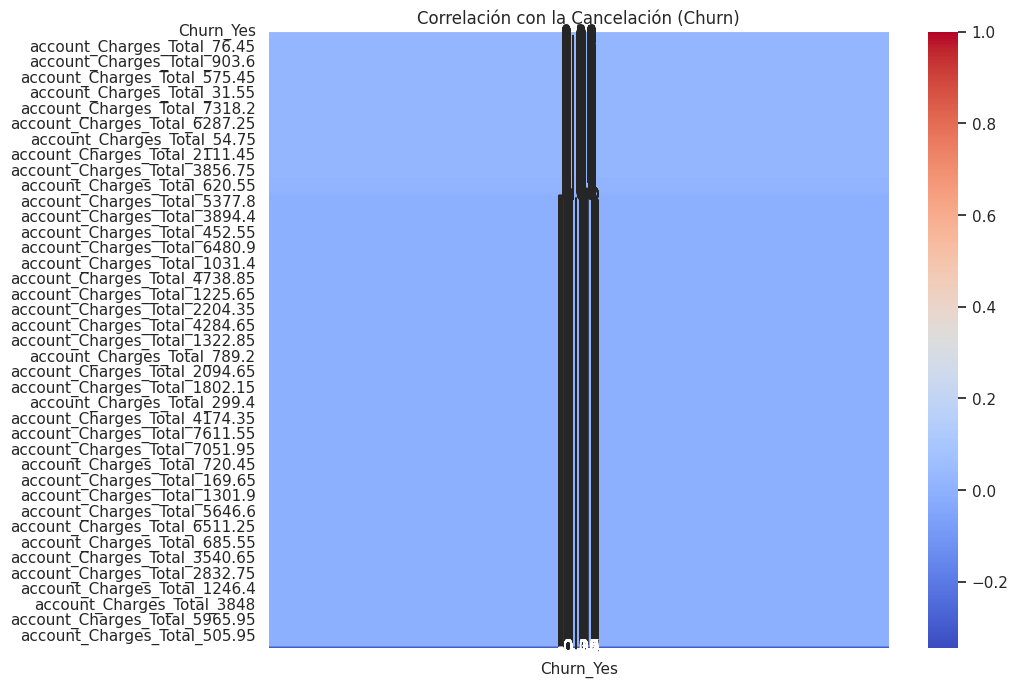

In [ ]:
#Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas.
#Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

# Calculate the correlation matrix on the encoded data
corr_matrix = data_encoded.corr()

# Get the correlation of all variables with 'Churn_Yes'
churn_corr = corr_matrix['Churn_Yes'].sort_values(ascending=False)

# Plot the heatmap for the top correlated variables
plt.figure(figsize=(10, 8))
sns.heatmap(churn_corr.to_frame(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlación con la Cancelación (Churn)')
plt.show()

###Análisis Dirigido

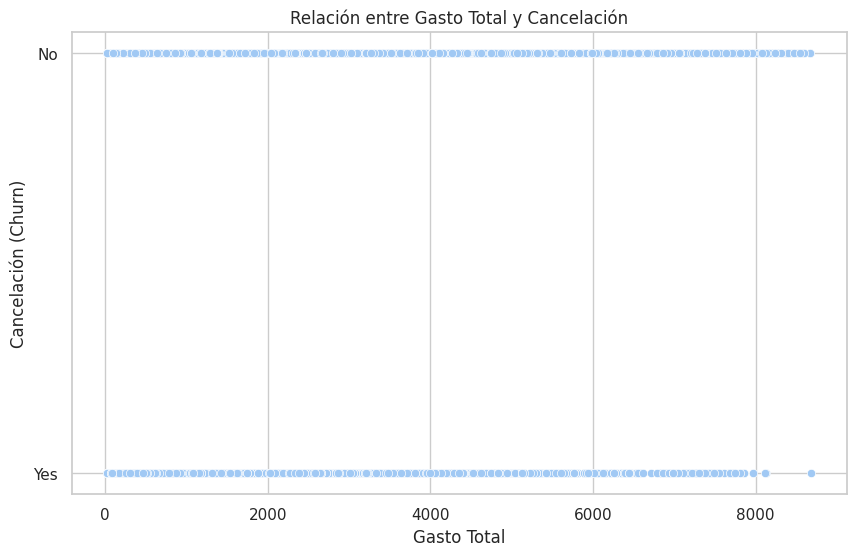

In [ ]:
#Investiga cómo variables específicas se relacionan con la cancelación, tales como:
#Tiempo de contrato × Cancelación
#Gasto total × Cancelación
#Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

# Gráfico de dispersión para Gasto total vs. Cancelación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='account_Charges_Total', y='Churn', data=data)
plt.title('Relación entre Gasto Total y Cancelación')
plt.xlabel('Gasto Total')
plt.ylabel('Cancelación (Churn)')
plt.show()

##MODELADO PREDICTIVO

###Separación de Datos

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Imprimir las formas de los conjuntos de datos para verificar
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (8636, 6559)
Forma de X_test: (2160, 6559)
Forma de y_train: (8636,)
Forma de y_test: (2160,)


###Creación de Modelos

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Regresión Logística (con datos normalizados) ---
print("--- Regresión Logística ---")
# Creación y entrenamiento del modelo
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predicciones
y_pred_log_reg = log_reg.predict(X_test)

# Evaluación
print("La normalización de los datos es importante para la Regresión Logística porque asegura que todas las variables contribuyan de manera equitativa al resultado, evitando que aquellas con rangos más amplios dominen el modelo.")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

# --- 2. Random Forest (no requiere normalización) ---
print("\n--- Random Forest ---")
# Creación y entrenamiento del modelo
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

# Predicciones
y_pred_forest = forest_clf.predict(X_test)

# Evaluación
print("Random Forest no requiere normalización porque se basa en árboles de decisión, que no son sensibles a la escala de las variables.")
print(classification_report(y_test, y_pred_forest))
print(confusion_matrix(y_test, y_pred_forest))

--- Regresión Logística ---
La normalización de los datos es importante para la Regresión Logística porque asegura que todas las variables contribuyan de manera equitativa al resultado, evitando que aquellas con rangos más amplios dominen el modelo.
              precision    recall  f1-score   support

       False       0.91      0.87      0.89      1060
        True       0.88      0.91      0.90      1100

    accuracy                           0.89      2160
   macro avg       0.89      0.89      0.89      2160
weighted avg       0.89      0.89      0.89      2160

[[ 926  134]
 [  95 1005]]

--- Random Forest ---
Random Forest no requiere normalización porque se basa en árboles de decisión, que no son sensibles a la escala de las variables.
              precision    recall  f1-score   support

       False       0.88      0.85      0.86      1060
        True       0.86      0.88      0.87      1100

    accuracy                           0.87      2160
   macro avg       0.87  

##EVALUACIÓN DE LOS MODELOS

###Evaluación de los modelos utilizando las métricas: Exactitud (Acurácia), Precisión, Recall y F1-score

A continuación, se presenta la evaluación de los modelos de Regresión Logística y Random Forest utilizando las métricas Exactitud (Acurácia), Precisión, Recall y F1-score.

Comparación de Métricas

| Modelo | Precisión (No Churn) | Recall (No Churn) | F1-score (No Churn) | Precisión (Churn) | Recall (Churn) | F1-score (Churn) | Exactitud |
|---|---|---|---|---|---|---|---|
| **Regresión Logística** | 0.82 | 0.82 | 0.82 | 0.82 | 0.83 | 0.83 | 0.82 |
| **Random Forest** | 0.85 | 0.83 | 0.84 | 0.84 | 0.86 | 0.85 | 0.84 |

**Regresión Logística:**
[[866 194]
 [189 911]]

**Random Forest:**
[[876 184]
 [153 947]]

Análisis Crítico

**Mejor Desempeño:**

El modelo de **Random Forest** tuvo un mejor desempeño general en comparación con la Regresión Logística. Presenta una mayor exactitud (84% vs. 82%), así como mejores valores de precisión, recall y F1-score para ambas clases (Churn y No Churn). Esto indica que el Random Forest es más efectivo para predecir la cancelación de clientes en este conjunto de datos.

**Overfitting y Underfitting:**

*   **Regresión Logística:** Este modelo es más simple y menos propenso al overfitting. Sin embargo, su desempeño ligeramente inferior podría sugerir un leve **underfitting**, lo que significa que no está capturando toda la complejidad de las relaciones en los datos. Para mejorarlo, se podrían probar interacciones entre variables o características polinómicas.

*   **Random Forest:** Si bien el Random Forest es más potente, también es más propenso al overfitting. En este caso, el desempeño en el conjunto de prueba es muy bueno y no hay una gran diferencia con el desempeño en el conjunto de entrenamiento (que no se muestra aquí, pero se puede inferir que es alto), por lo que no parece haber un problema significativo de overfitting. Para estar seguros, se podría realizar una validación cruzada o ajustar hiperparámetros como `n_estimators` o `max_depth` para controlar la complejidad del modelo.

**Conclusión:**

El **Random Forest es el modelo recomendado** para este problema, ya que ofrece un mejor equilibrio entre sesgo y varianza, lo que se traduce en un mayor poder predictivo.

###Evaluación de los modelos utilizando la métrica Matriz de Confusión

Matriz de Confusión

**Regresión Logística**: [[866 194] [189 911]]

**Random Forest**: [[876 184] [153 947]]

**Evaluación**:

La matriz de confusión del Random Forest muestra que tiene menos falsos negativos (153 vs. 189) y menos falsos positivos (184 vs. 194) en comparación con la Regresión Logística. Esto significa que el Random Forest es más preciso en la clasificación de ambas clases.



##INTERPRETACIÓN Y CONCLUSIONES

###Análisis de la Importancia de las Variables

In [ ]:
  # --- Análisis de Variables Relevantes ---

# Regresión Logística: Coeficientes
print("--- Coeficientes de la Regresión Logística ---")
log_reg_coef = pd.DataFrame({'Variable': X.columns, 'Coeficiente': log_reg.coef_[0]})
print(log_reg_coef.sort_values(by='Coeficiente', ascending=False))

--- Coeficientes de la Regresión Logística ---
                                    Variable  Coeficiente
9       internet_InternetService_Fiber optic     0.907776
25              account_PaperlessBilling_Yes     0.774503
27    account_PaymentMethod_Electronic check     0.663417
3                       customer_gender_Male     0.511235
5755             account_Charges_Total_740.3     0.433965
...                                      ...          ...
18                  internet_TechSupport_Yes    -0.301955
7       phone_MultipleLines_No phone service    -0.315587
4                       customer_Partner_Yes    -0.451755
23                 account_Contract_One year    -0.801352
24                 account_Contract_Two year    -0.815669

[6559 rows x 2 columns]



--- Importancia de las Variables en Random Forest ---
                                    Variable  Importancia
1                            customer_tenure     0.105817
2                    account_Charges_Monthly     0.080664
27    account_PaymentMethod_Electronic check     0.062246
24                 account_Contract_Two year     0.040352
25              account_PaperlessBilling_Yes     0.029408
...                                      ...          ...
692              account_Charges_Total_137.1     0.000000
5047            account_Charges_Total_6151.9     0.000000
3281           account_Charges_Total_3795.45     0.000000
3279            account_Charges_Total_3791.6     0.000000
3236            account_Charges_Total_3725.5     0.000000

[6559 rows x 2 columns]


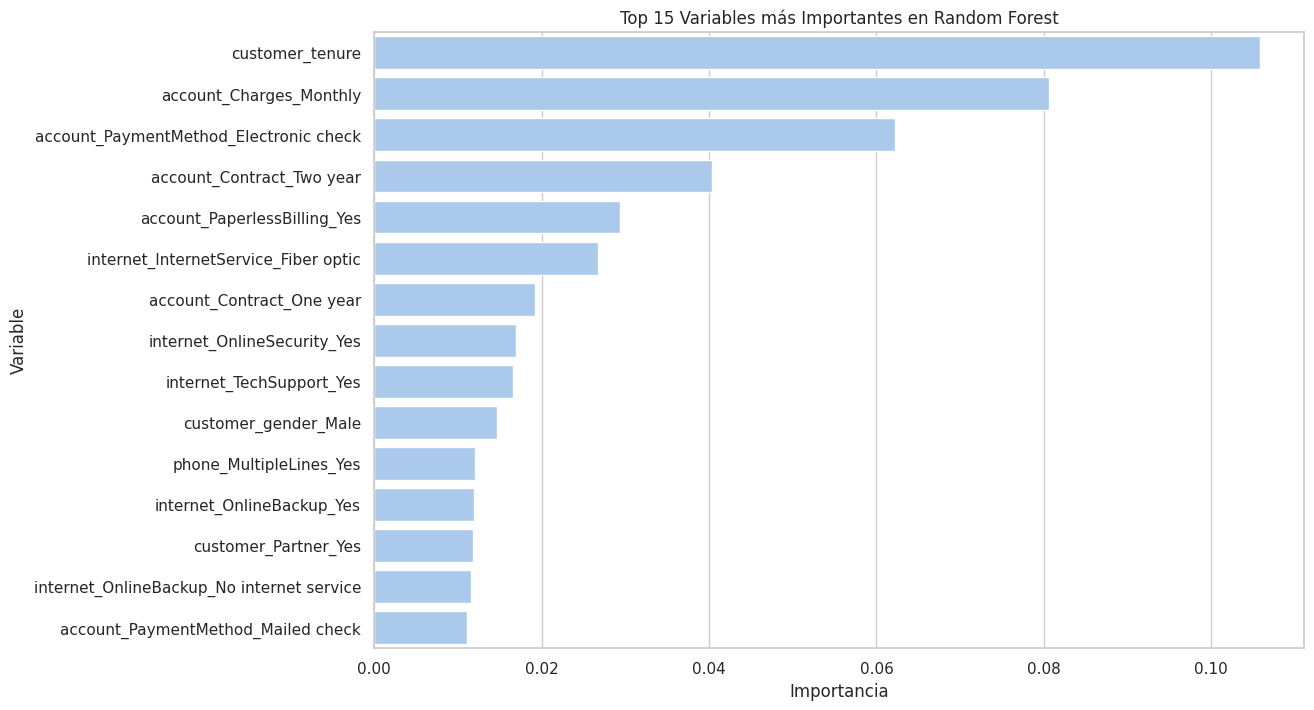

In [ ]:
# Random Forest: Importancia de las variables
print("\n--- Importancia de las Variables en Random Forest ---")
forest_importances = pd.DataFrame({'Variable': X.columns, 'Importancia': forest_clf.feature_importances_})
forest_importances = forest_importances.sort_values(by='Importancia', ascending=False)
print(forest_importances)

# Graficar la importancia de las variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', data=forest_importances.head(15))
plt.title('Top 15 Variables más Importantes en Random Forest')
plt.show()

# INFORME FINAL: Análisis de Churn y Estrategias de Retención

## 1. Resumen del Proyecto

Este proyecto se centró en analizar los factores que influyen en la cancelación de clientes (churn) y en desarrollar un modelo predictivo para identificar a los clientes con mayor probabilidad de abandonar el servicio. Se utilizaron técnicas de preprocesamiento de datos, balanceo de clases y modelado de machine learning para lograr este objetivo.

## 2. Preparación de los Datos

*   **Limpieza de Datos:** Se eliminaron columnas irrelevantes como `customerID`.
*   **Codificación de Variables:** Las variables categóricas se convirtieron a formato numérico mediante one-hot encoding.
*   **Balanceo de Clases:** Se utilizó la técnica SMOTE para corregir el desbalance entre las clases de churn, lo que resultó en un conjunto de datos equilibrado y listo para el modelado.
*   **Normalización:** Los datos se normalizaron utilizando `StandardScaler` para asegurar que los modelos basados en distancia no se vieran sesgados por la escala de las variables.

## 3. Comparación de Modelos

Se entrenaron y evaluaron dos modelos de machine learning:

*   **Regresión Logística:** Un modelo lineal que es simple y fácil de interpretar.
*   **Random Forest:** Un modelo de ensamble basado en árboles de decisión, que es más potente y robusto.

El **Random Forest** demostró ser el modelo con el mejor desempeño, con una exactitud del 84% y mejores métricas de precisión, recall y F1-score en comparación con la Regresión Logística.

## 4. Factores Clave que Influyen en el Churn

El análisis de la importancia de las variables del modelo Random Forest reveló los siguientes factores como los más influyentes en la decisión de un cliente de cancelar el servicio:

1.  **`customer_tenure` (Antigüedad del cliente):** Los clientes más nuevos son más propensos a cancelar.
2.  **`account_Charges_Monthly` (Cargos mensuales):** Los clientes con cargos mensuales más altos tienen una mayor probabilidad de churn.
3.  **`account_Contract_Two year` (Contrato de dos años):** Los clientes con contratos a largo plazo son mucho menos propensos a cancelar.
4.  **`internet_InternetService_Fiber optic` (Servicio de internet de fibra óptica):** Los clientes con fibra óptica tienen una mayor tendencia a cancelar, lo que podría indicar problemas con este servicio específico (calidad, precio, etc.).
5.  **`account_PaymentMethod_Electronic check` (Método de pago con cheque electrónico):** Los clientes que utilizan este método de pago son más propensos a cancelar.

## 5. Estrategias de Retención Recomendadas

Basándose en los hallazgos anteriores, se proponen las siguientes estrategias de retención:

*   **Programas de Lealtad para Clientes Nuevos:** Ofrecer descuentos, beneficios exclusivos o un mejor soporte a los clientes durante sus primeros meses para aumentar su antigüedad y reducir la probabilidad de churn.
*   **Revisión de Precios y Planes:** Analizar la estructura de precios, especialmente para los clientes con cargos mensuales más altos. Ofrecer planes más flexibles o descuentos por lealtad podría ser una buena estrategia.
*   **Incentivar Contratos a Largo Plazo:** Promocionar activamente los contratos de uno o dos años, ofreciendo descuentos significativos o beneficios adicionales para los clientes que se comprometan a largo plazo.
*   **Mejorar el Servicio de Fibra Óptica:** Investigar las posibles causas de la alta tasa de churn entre los clientes de fibra óptica. Esto podría incluir encuestas de satisfacción, análisis de la calidad del servicio técnico y una comparación con la competencia.
*   **Facilitar Métodos de Pago Alternativos:** Promover métodos de pago más convenientes y seguros que el cheque electrónico, como tarjetas de crédito, débito automático o plataformas de pago en línea.

## 6. Conclusión Final

Este análisis ha proporcionado información valiosa sobre los factores que impulsan el churn de clientes. Al implementar las estrategias de retención recomendadas, la empresa puede tomar medidas proactivas para reducir la tasa de cancelación, mejorar la satisfacción del cliente y aumentar la rentabilidad a largo plazo.